## UFC FIGHT ANALYSIS AND PREDICTION

List of all UFC fights since 2013 with summed up entries of each fighter's round by round record preceding that fight.
Each row represents a single fight - with each fighter's previous records summed up prior to the fight. blank stats mean its the fighter's first fight since 2013 which is where granular data for UFC fights beings



In [230]:
# Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv', parse_dates=['Date'])
data.head(5)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Columns: 895 entries, BPrev to winner
dtypes: datetime64[ns](1), float64(873), int64(13), object(8)
memory usage: 10.1+ MB


# Understanding the data
From this, we can see that we have a total of 879 Columns and one dependent variable. The columns themselves have 4 integer types (Streaks, Previous Wins etc), 5 object types (Names, Winner - basically strings and arrays) and 870 Float types.

In [232]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,1477.000000,1477.000000,1474.000000,1476.000000,1477.000000,1477.000000,978.000000,978.000000,978.000000,978.000000,...,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,1.735274,0.654705,30.954545,177.451220,1964.633040,73.804333,0.036810,0.896728,0.431493,2.986708,...,211.965278,34.062500,66.604167,5.527778,4.319444,5.138889,12.097222,224.965278,4.562500,263.069444
std,1.895561,1.057269,4.020311,8.561541,666.949141,14.980531,0.193748,1.255722,0.830527,3.987291,...,139.412374,68.819742,94.574736,22.374419,12.854023,14.312013,36.429320,142.328509,19.698681,162.386212
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,28.000000,172.000000,1755.000000,65.000000,0.000000,0.000000,0.000000,0.000000,...,110.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,126.750000,0.000000,139.000000
50%,1.000000,0.000000,31.000000,177.000000,2156.000000,70.000000,0.000000,0.000000,0.000000,2.000000,...,214.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,232.000000,0.000000,291.000000
75%,3.000000,1.000000,34.000000,182.000000,2337.000000,84.000000,0.000000,1.000000,1.000000,4.000000,...,294.500000,47.500000,109.000000,0.000000,0.000000,0.000000,2.000000,299.000000,0.000000,300.000000
max,11.000000,7.000000,46.000000,213.000000,2882.000000,120.000000,2.000000,9.000000,6.000000,33.000000,...,647.000000,496.000000,529.000000,144.000000,91.000000,62.000000,264.000000,659.000000,128.000000,841.000000


# Missing Values
two methods of dealing with NaN Values

In [233]:
data.isna().any()

BPrev                                                    False
BStreak                                                  False
B_Age                                                     True
B_Height                                                  True
B_HomeTown                                                True
B_ID                                                     False
B_Location                                                True
B_Name                                                   False
B_Weight                                                 False
B__Round1_Grappling_Reversals_Landed                      True
B__Round1_Grappling_Standups_Landed                       True
B__Round1_Grappling_Submissions_Attempts                  True
B__Round1_Grappling_Takedowns_Attempts                    True
B__Round1_Grappling_Takedowns_Landed                      True
B__Round1_Strikes_Body Significant Strikes_Attempts       True
B__Round1_Strikes_Body Significant Strikes_Landed      

In [140]:
data['B_Age'] = data['B_Age'].fillna(np.mean(data['B_Age']))
data['B_Height'] = data['B_Height'].fillna(np.mean(data['B_Height']))
data['R_Age'] = data['R_Age'].fillna(np.mean(data['R_Age']))
data['R_Height'] = data['R_Height'].fillna(np.mean(data['R_Height']))
data.tail(10)

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
1467,3,0,32.0,180.0,"Spokane, Washington USA",2019,Hagatna Guam,Jon Tuck,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1468,0,0,29.0,167.0,Olsztyn Poland,2280,Olsztyn Poland,Joanna Jedrzejczyk,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1469,0,0,32.0,162.0,"Las Vegas, Nevada USA",2135,"St. Charles, Missouri USA",Josh Sampo,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,red
1470,1,1,32.0,172.0,"San Diego, California USA",1057,"San Diego, California USA",Dominick Cruz,61,0.0,...,9.0,0.0,0.0,9.0,0.0,276.0,0.0,276.0,DEC,blue
1471,3,2,37.0,190.0,"Las Vegas, Nevada USA",377,"Las Vegas, Nevada USA",Frank Mir,119,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue
1476,2,1,31.0,187.0,The Netherlands,786,"Leiden, Holland The Netherlands",Gegard Mousasi,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,red


## Data visualization

See the percentage of winners from each side: red and blue
How do fighters win the flight? Decision, submission, or knock-down
How does age affect the winning chance?
How does height affect the winning chance?


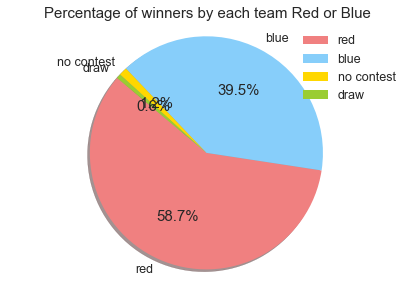

In [237]:
winner_values = data.winner.value_counts()
winner_values.index.values
winner_values.values
x = winner_values.values
explode = (0, 0, 0, 0)
values = winner_values.index.values
colors = ['lightcoral', 'lightskyblue', 'gold', 'yellowgreen']

patches, texts, percents = plt.pie(x, explode=explode, labels=values, colors=colors, autopct='%1.1f%%',shadow=True, startangle=140)
plt.legend(patches, values, loc="upper right")
plt.axis("equal")
plt.tight_layout()
plt.title("Percentage of winners by each team Red or Blue")
plt.show()

In [142]:
sumaries = pd.concat([data.Date, pd.get_dummies(data['winby'])], axis=1)
plot_data = sumaries.groupby(sumaries.Date.dt.year).sum()

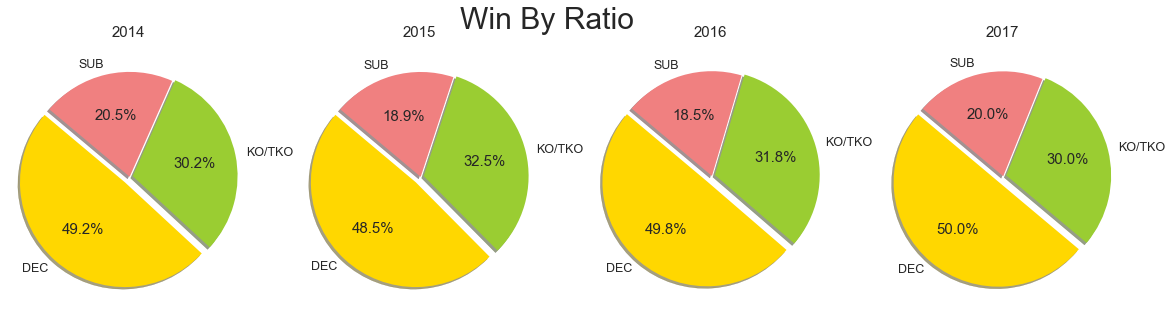

In [143]:
labels = plot_data.columns.values
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.07, 0.03, 0)  # explode 1st slice
plt.figure(figsize=(20, 5))
for idx, row in enumerate(plot_data.iterrows()):
    plt.subplot(1, 4, idx+1)
    sizes = row[1]
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(str(row[0]))
plt.suptitle('Win By Ratio', fontsize=30)
plt.show()

AGE

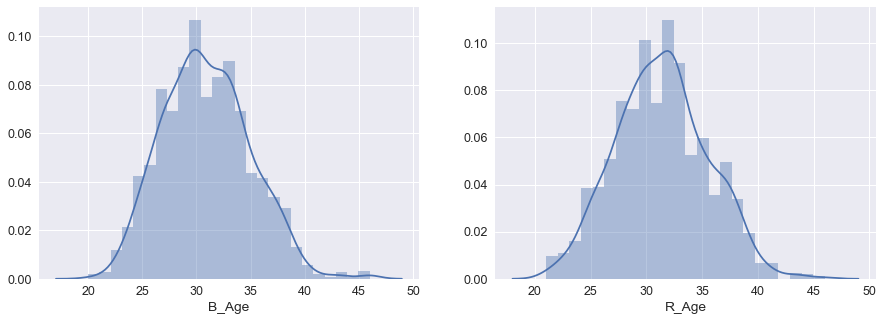

In [144]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(data.B_Age, ax=ax[0])
sns.distplot(data.R_Age, ax=ax[1])


These skills peak at 27-35 and fighter's fighting at this age should have higher chance of winning the fight. 

In [145]:
BAge = data.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)


B_Age
30.0    164
33.0    138
29.0    134
32.0    128
27.0    120
31.0    112
28.0    106
34.0    106
26.0     72
35.0     67
Name: winner, dtype: int64

fights have been won by fighters in their late 20’s through early 30’s  --> peak performance

Text(0.5,1,'Age of Red fighters')

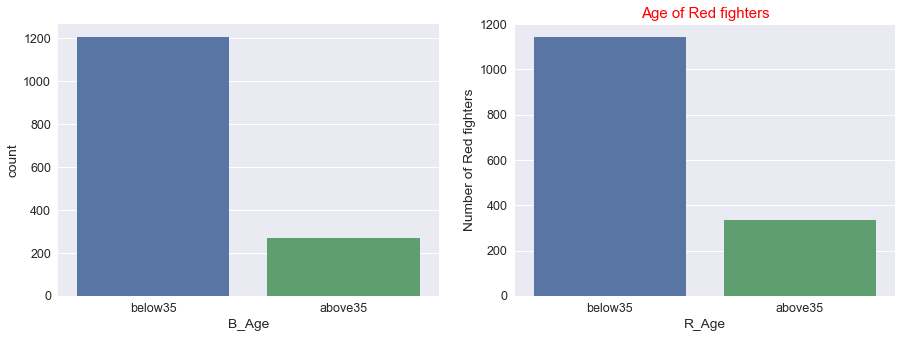

In [146]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
above35 =['above35' if i >= 35 else 'below35' for i in data.B_Age]
data_B = pd.DataFrame({'B_Age':above35})
sns.countplot(x=data_B.B_Age, ax=ax[0])
plt.ylabel('Number of fighters')
plt.title('Age of Blue fighters',color = 'blue',fontsize=15)

above35 =['above35' if i >= 35 else 'below35' for i in data.R_Age]
data_R = pd.DataFrame({'R_Age':above35})
sns.countplot(x=data_R.R_Age, ax=ax[1])
plt.ylabel('Number of Red fighters')
plt.title('Age of Red fighters',color = 'Red',fontsize=15)

Most fighters are below 35.

Height

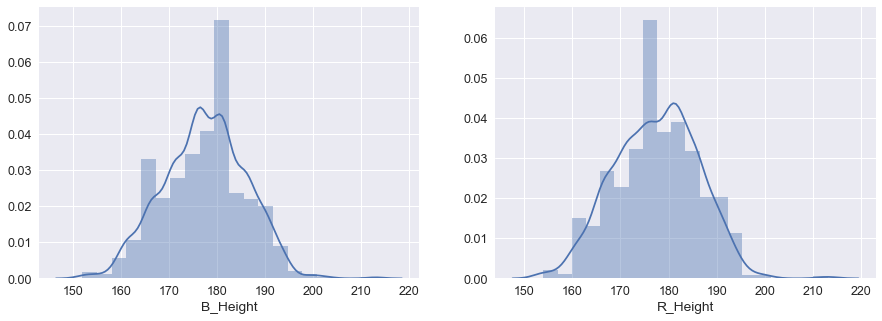

In [147]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(data.B_Height, bins = 20, ax=ax[0]) #Blue 
sns.distplot(data.R_Height, bins = 20, ax=ax[1]) #Red


Taller has more advantage in fight.

In [148]:
data['Height Difference'] = data.B_Height - data.R_Height
data[['Height Difference', 'winner']].groupby('winner').mean()


,Height Difference
winner,
blue,0.118151
draw,2.444444
no contest,-1.411765
red,-0.052536


Taller fighter has an advantage and, on average, wins

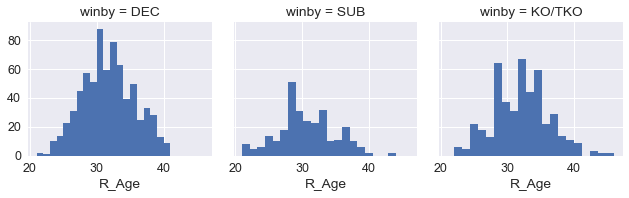

In [149]:
g = sns.FacetGrid(data, col='winby')
g.map(plt.hist, 'R_Age', bins=20)


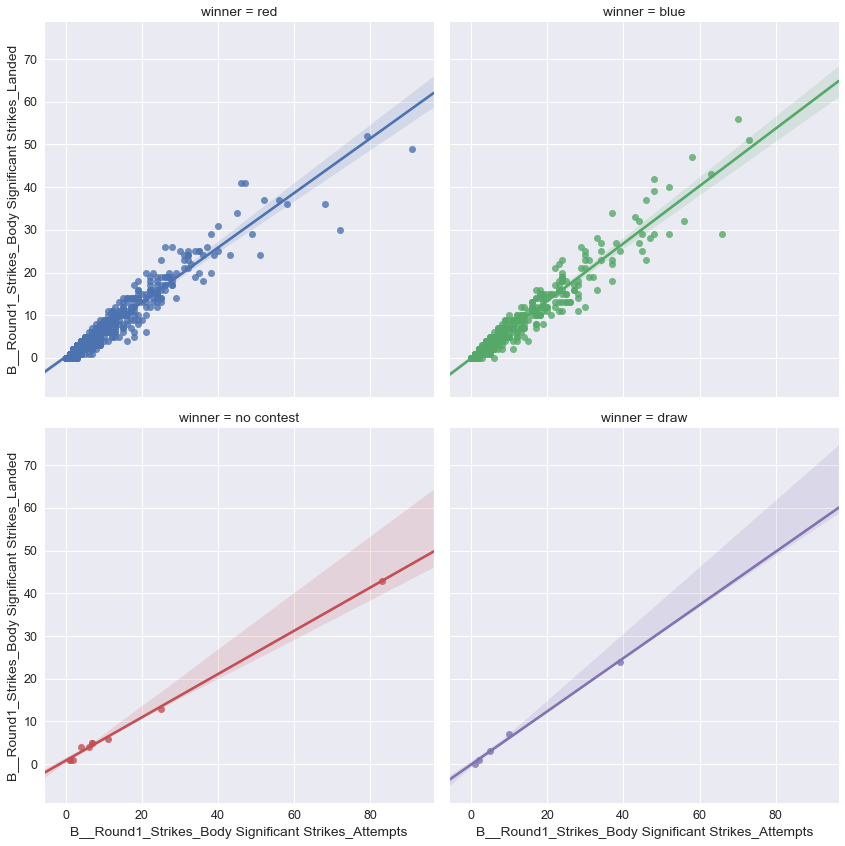

In [150]:
sns.lmplot(x="B__Round1_Strikes_Body Significant Strikes_Attempts", 
               y="B__Round1_Strikes_Body Significant Strikes_Landed", 
               col="winner", hue="winner", data=data, col_wrap=2, size=6)


More offensive attempts you make should mean more you land on your opponent (and with right skills and power - more chance you have to win the fight).



In [151]:
data.fillna(value=0,inplace=True)
text_cols = data.select_dtypes(include=['O']).columns
for col in text_cols:
    data[col] = data[col].astype('category')

In [152]:
data[text_cols] = data[text_cols].apply(lambda x: x.cat.codes)

Data Correlation

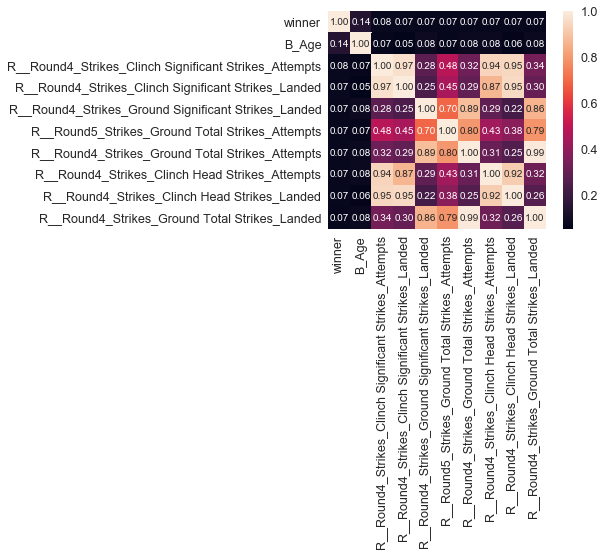

In [153]:
cocorrmat = data.corr()
cols = cocorrmat.nlargest(10, 'winner')['winner'].index
cm = np.corrcoef(data[cols].values.T)
cm
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Build Models

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [227]:
def evaluate_model(estimator, X, y):
    clr = classification_report(y, estimator.predict(X))
    acc = accuracy_score(y, estimator.predict(X))
    print('Accuracy: ', acc)
    print(clr)

In [162]:
drop_columns = ['B_ID','B_Name','R_ID','R_Name','winby','Date', 'winner']
X = data.drop(columns= drop_columns)
y = data['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

In [176]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
evaluate_model(rfc, X_test, y_test)

Accuracy:  0.5675675675675675
             precision    recall  f1-score   support

          0       0.44      0.46      0.45       111
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         2
          3       0.65      0.65      0.65       181

avg / total       0.56      0.57      0.57       296



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [170]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [400, 500, 600, 700],
    'min_samples_split': [2, 5, 10, 20, 50],
    'max_leaf_nodes' : [20, 50, 60],
    'n_jobs': [2],
}

In [172]:
cv = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs=-1)
cv.fit(X_train, Y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [400, 500, 600, 700], 'min_samples_split': [2, 5, 10, 20, 50], 'max_leaf_nodes': [20, 50, 60], 'n_jobs': [2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [173]:
print(cv.best_estimator_)
print(cv.best_score_)
print(cv.best_params_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.5808636748518204
{'max_leaf_nodes': 50, 'min_samples_split': 5, 'n_estimators': 600, 'n_jobs': 2}


In [228]:
evaluate_model(cv.best_estimator_, X_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy:  0.5912162162162162
             precision    recall  f1-score   support

          0       0.41      0.15      0.22       111
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         2
          3       0.62      0.87      0.72       181

avg / total       0.53      0.59      0.53       296



In [210]:
feature_scores = cv.best_estimator_.feature_importances_
feature_scores = list(zip(feature_scores, X_train.columns.values))

In [211]:
feature_scores = np.array(feature_scores)
feature_scores.sort(axis=0)

In [219]:
feature_scores

array([['0.0', 'BPrev'],
       ['0.0', 'BStreak'],
       ['0.0', 'B_Age'],
       ...,
       ['9.83482586419181e-05', 'R__Round5_TIP_Neutral Time'],
       ['9.83985397508196e-05', 'R__Round5_TIP_Side Control Time'],
       ['9.941630976943273e-05', 'R__Round5_TIP_Standing Time']],
      dtype='<U53')

In [222]:
def rfc_features(score, num_features):
    top_n_features = score[-num_features:]
    test_rf = RandomForestClassifier(n_estimators=600, 
                       min_samples_split=5, 
                       max_leaf_nodes=50, 
                       n_jobs=2,
                       random_state=0)
    test_rf.fit(X_train[top_n_features[:,1]], Y_train)
    return accuracy_score(Y_test, test_rf.predict(X_test[top_n_features[:,1]]))

In [238]:
number_of_features = [50, 100, 200, 300, 400, 500, 600]
results = []
for num in number_of_features:
    acc = rfc_features(feature_scores, num)
    results.append(acc)

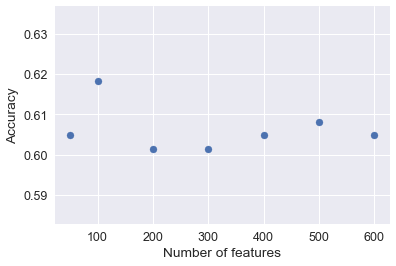

In [239]:
plt.scatter(number_of_features, results)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.show()

In [225]:
top_100_features = feature_scores[-100:]
final_rfc = RandomForestClassifier(n_estimators=600, 
                   min_samples_split=5, 
                   max_leaf_nodes=50, 
                   n_jobs=2,
                   random_state=0)
final_rfc.fit(X_train[top_100_features[:,1]], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=50,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [229]:
evaluate_model(final_rfc, X_test[top_100_features[:,1]], y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy:  0.6182432432432432
             precision    recall  f1-score   support

          0       0.60      0.05      0.10       111
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00         2
          3       0.62      0.98      0.76       181

avg / total       0.60      0.62      0.50       296

